In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [10]:
data = pd.read_csv('clustering data.csv')
data.head()


,Unnamed: 0,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Sex (M=1),conjoint_cluster,cluster
0,1,2,5,4,5,1,1,3
1,2,9,6,7,3,1,1,3
2,3,6,4,6,6,1,2,3
3,4,24,5,7,5,2,1,1
4,5,2,2,3,5,2,2,3


In [11]:
features = ['Age (1-7)', 'Income (1-7)', 'Education (1-6)', 'Sex (M=1)']
X = data[features]
y = data.cluster

#value max_depth chosen based on best score improvement of .01
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X, y)
print(dtc.score(X, y))
print(dtc.feature_importances_)

0.6624605678233438
[0.46115713 0.         0.20909065 0.32975222]


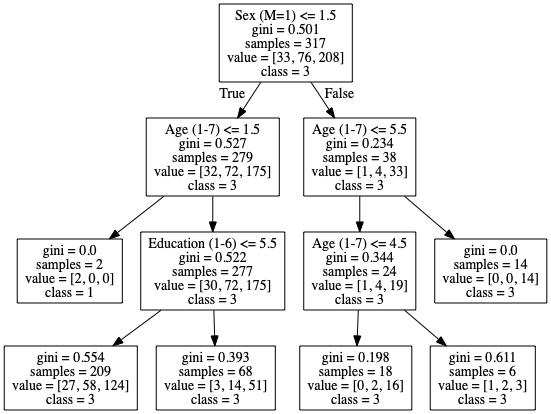

In [12]:
#create graph data
dtree_data = tree.export_graphviz(dtc, out_file=None, 
                            feature_names=features,  
                            class_names=["1","2", "3", "4"])
#plot graph
graph = pydotplus.graph_from_dot_data(dtree_data)  
#display image
Image(graph.create_png())